In [670]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [671]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [672]:
df = pd.read_csv(r"C:\MY FILE\MBAN 6110S-Data Science\assignment3\kc_house_data.csv")

Your task is to build a regression model which can predict the price of a house, based on the features available.

Data:
Questions / Tasks:
1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.
2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

In [673]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [674]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [675]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Data quality issues 
- convert datatype:  
        ' date' /''yr_built'/ 'yr_renovated' / 'zipcode'

- Remove outliers
       - Observation '15870' with 33 bedrooms and the sqft_living is only 1620, this doesnot make sense, this observation need to be removed. 

- convert to dummie variables: 'waterfront', 'view', 'grade','condition

- what is the difference between 'sqft_living15' and 'sqft_living'.


In [676]:
# convert datatype
df['date'] = pd.to_datetime(df['date'])
#df['yr_built'] = pd.to_datetime(df['yr_built'])
#df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])
df['zipcode'].astype(object)
df['waterfront'].astype(bool)
df['view'].astype(object)
df['grade'].astype(object)


0        7
1        7
2        6
3        7
4        8
        ..
21608    8
21609    8
21610    7
21611    8
21612    7
Name: grade, Length: 21613, dtype: object

In [677]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [678]:
# create dummie variables 
dummies_view = pd.get_dummies(df.view, prefix= 'view', dtype= int)
dummies_waterfront = pd.get_dummies(df.waterfront, prefix='wf',dtype =int)
dummies_grade = pd.get_dummies(df.grade, prefix='grade', dtype = int)
dummies_condition = pd.get_dummies(df.condition, prefix='condition', dtype= int)
df2 = pd.concat([df,dummies_view,dummies_waterfront,dummies_condition,dummies_grade], axis=1)

df2.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [679]:
# extract year, month and create new columns 

df2['year'] = df['date'].dt.year
df2['month'] = df['date'].dt.month

In [680]:
# drop outliers for observation with more than 30 bedrooms
df = df.drop(df[df['bedrooms'] > 30].index)

<Axes: >

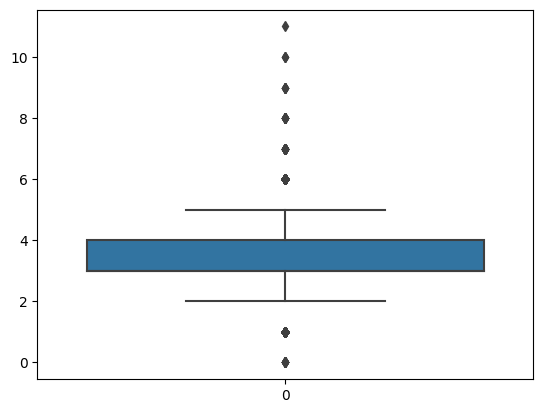

In [681]:
sns.boxplot(df['bedrooms'])

<Axes: xlabel='waterfront', ylabel='count'>

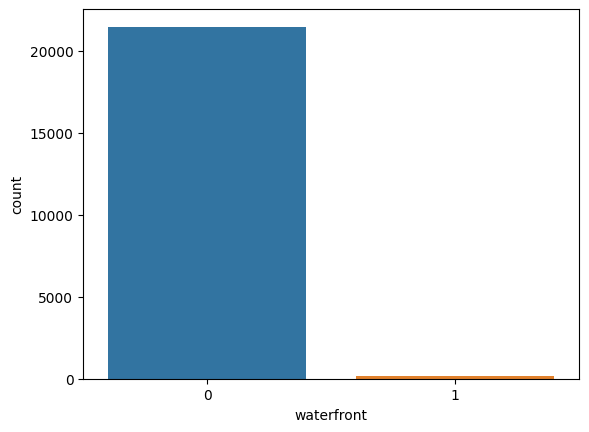

In [682]:
sns.countplot(data = df, x='waterfront')

<Axes: xlabel='view', ylabel='count'>

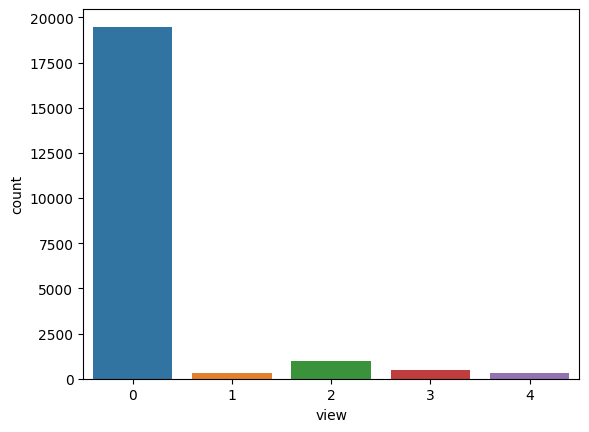

In [683]:
sns.countplot(data = df, x = 'view')

using stastic model 

In [684]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'wf_0', 'wf_1', 'condition_1',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_1',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'year',
       'month'],
      dtype='object')

results = ols("casual ~ temp + humidity + workingday", data=bikes).fit()
print(results.summary())

In [688]:
# using statistic model to build a ordinary least square linear regression model , fit the model and check the result
model_ols = ols('price ~ bedrooms + bathrooms + sqft_living + floors + sqft_above + sqft_basement + yr_built + yr_renovated + lat + long + year + month', data = df2)
result_model_ols = model_ols.fit()
print(result_model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     3114.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:21:14   Log-Likelihood:            -2.9734e+05
No. Observations:               21613   AIC:                         5.947e+05
Df Residuals:                   21601   BIC:                         5.948e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.127e+08   1.09e+07    -10.350

pred_val = result